# Wrangling of WeRateDogs Twitter data

## Introduction

The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

## Table of Contents
- [Data gathring](#gathering)
- [Data assessment](#assessment)
- [Data cleaning](#cleaning)
- [Data storing](#storing)
- [Data analysis and visualisation](#analysis)

## 1. Data gathering

In [2]:
#import libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
from matplotlib import pyplot

### 1.1 Twitter archieve data

In [3]:
#read csv file and store in "tweet_data". Take a look on first 5 rows.
tweet_data=pd.read_csv('twitter-archive-enhanced.csv')
tweet_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.2 Image predictions data

In [4]:
# Use requests library to download tsv file from a website
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open((url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [5]:
# Read in tsv file as a Pandas DataFrame and store in "predictions".
predictions=pd.read_csv('image-predictions.tsv',sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#find number of rows, data types and missing values
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 1.3 Twitter API data

Personal API keys, secrets, and tokens have been replaced with placeholders

In [7]:
# consumer_key = 'XXXX' 
# consumer_secret = 'XXXX'
# access_token = 'XXXX'
# access_secret = 'XXXX'

In [8]:
# Variables created for tweepy query
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [9]:
# Write the querying JSON data into tweet_json.txt
# with open('tweet_json.txt','a',encoding = 'utf8') as f:
#     for tweet_id in tweet_data['tweet_id']:
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode = 'extended') # set mode to extended
#             json.dump(tweet._json, f)
#             f.write('\n')
#         except: 
#             print('tweet_id = %s didn\'t work' % (tweet_id))

In [10]:
# Converting JSON data to dataframe
tweets_list =[]
with open('tweet_json.txt') as file:
    for line in file:    
        tweets_dict = {}
        tweets_json = json.loads(line)        
        try:
            tweets_dict['tweet_id'] = tweets_json['id']
        except:
            tweets_dict['tweet_id'] = 'na'

        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)

In [11]:
tweets_api = pd.DataFrame(tweets_list)

In [12]:
#find number of rows, data types and missing values
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
favorite_count    2332 non-null int64
retweet_count     2332 non-null int64
tweet_id          2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


## 2. Data assessment 

### 2.1 Twitter archieve data

In [13]:
# Display the tweet_data table
tweet_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
#this displays a summary of the dataframe including the number of non-null values in each column
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
#this returns a tuple of the dimensions of the dataframe
tweet_data.shape

(2356, 17)

In [16]:
#this returns the datatypes of the columns
tweet_data.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [17]:
#this returns the number of unique values in each column
tweet_data.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [18]:
#this returns descriptive statistics for each column of data
tweet_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
#count of duplicates in the dataset
sum(tweet_data.duplicated())

0

In [20]:
#this returns counts of unique values of rating denominator column
tweet_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
# number of tweets which has rating denominator not equal to 10
tweet_data.query('rating_denominator != 10').rating_denominator.count()

23

In [22]:
#this returns counts of unique values of rating numerator
tweet_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
#assess columns where rating numerator is more than 20
pd.set_option('display.max_colwidth',-1)
tweet_data[tweet_data.rating_numerator>20].text

188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                                                   
189     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10                                    
290     @markhoppus 182/10                                                                                                                                                       
313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                             
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   

In [24]:
# number of tweets which has rating numerator > 20
tweet_data.query('rating_numerator > 20').rating_numerator.count()

24

In [25]:
#number of null values of exanded urls
tweet_data.expanded_urls.isnull().sum()

59

In [26]:
#this returns counts of unique values of source column
tweet_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

During data assessment of tweet_data the following quality and tidiness issues have been found:
<br>

Data quality issues:
* Remove retweets
* Data completeness: columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' should be dropped because they have a lot of missing data and we need only original data for this project.
* Data correctness: 23 tweets have rating denominator not equal to 10. These tweets will be removed.  
* Data correctness: 24 tweets have rating numerator more than 20. These tweets will be removed
* Keep only columns where first prediction p1_dog is True
* Columns shoud be renamed: 'timestamp': 'tweet_timestamp', 'text': 'tweet_text','name': 'dog_name', 'source': 'tweet_source'
* Timestamp should be datetime format
* For source column url should be extracted from html tags.
    
Tideness issues:
* For dog stage we have 4 columns: Doggo, floofer, puppo, pupper. We can create only one column 'dog_stage', where doggo, puppo, pupper are the values.
* Column 'rating numerator' and 'rating denominator' can be merge in one column called 'rating'. Column 'rating_denominator' will be removed because all values are 10. 



### 2.2 Image predictions data

In [27]:
#display image predictions data
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [28]:
#this displays a summary of the dataframe including the number of non-null values in each column
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
#this returns a tuple of the dimensions of the dataframe
predictions.shape

(2075, 12)

In [30]:
#this returns the datatypes of the columns
predictions.dtypes

tweet_id    int64  
jpg_url     object 
img_num     int64  
p1          object 
p1_conf     float64
p1_dog      bool   
p2          object 
p2_conf     float64
p2_dog      bool   
p3          object 
p3_conf     float64
p3_dog      bool   
dtype: object

In [31]:
#this returns descriptive statistics for each column of data
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
#this returns counts of unique values of p1 column
predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
German_shepherd              20 
Siberian_husky               20 
Staffordshire_bullterrier    20 
Cardigan                     19 
web_site                     19 
Shetland_sheepdog            18 
teddy                        18 
Eskimo_dog                   18 
beagle                       18 
Maltese_dog                  18 
Shih-Tzu                     17 
Lakeland_terrier             17 
Rottweiler                   17 
kuvasz                       16 
Italian_greyhound            16 
          

In [33]:
#find out how many dogs were predicted with first prediction
predictions.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [34]:
#this returns counts of unique values of p2 column
predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                  92 
Cardigan                          73 
Chihuahua                         44 
Pomeranian                        42 
French_bulldog                    41 
Chesapeake_Bay_retriever          41 
toy_poodle                        37 
cocker_spaniel                    34 
miniature_poodle                  33 
Siberian_husky                    33 
beagle                            28 
Pembroke                          27 
collie                            27 
Eskimo_dog                        27 
kuvasz                            26 
Italian_greyhound                 22 
Pekinese                          21 
American_Staffordshire_terrier    21 
toy_terrier                       20 
miniature_pinscher                20 
chow                              20 
malinois                          20 
Samoyed                           20 
Boston_bull                       19 
Norwegian_elkhound                19 
Staffordshir

In [35]:
#find out how many dogs were predicted with second prediction
predictions.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [36]:
#this returns counts of unique values of p3 column
predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [37]:
#find out how many dogs were predicted with third prediction
predictions.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

During assessment of image predictions data the following quality issues have been found:
<br>

Data quality issues:
* columns should be renamed: p1 - prediction1, p1_conf- prediction1_CI, p1_dog - prediction1_dog, p2 - prediction2, p2_conf- prediction2_CI, p2_dog - prediction2_dog, p3 - prediction3, p3_conf- prediction3_CI, p3_dog - prediction3_dog. 
* only values where p1_dog is True will be kept


### 2.3 Twitter API data

In [38]:
#display tweets_api table
tweets_api

,favorite_count,retweet_count,tweet_id
0,37419,8129,892420643555336193
1,32149,6024,892177421306343426
2,24247,3987,891815181378084864
3,40723,8292,891689557279858688
4,38954,8983,891327558926688256
5,19565,2984,891087950875897856
6,11432,1977,890971913173991426
7,63090,18087,890729181411237888
8,26920,4093,890609185150312448
9,30861,7071,890240255349198849


In [39]:
#this displays a summary of the dataframe including the number of non-null values in each column
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
favorite_count    2332 non-null int64
retweet_count     2332 non-null int64
tweet_id          2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [40]:
#number of duplicated tweets 
tweets_api.tweet_id.duplicated().sum()

0

In [41]:
#this returns a tuple of the dimensions of the dataframe
tweets_api.shape

(2332, 3)

In [42]:
#this returns descriptive statistics for each column of data
tweets_api.describe()

,favorite_count,retweet_count,tweet_id
count,2332.000000,2332.000000,2.332000e+03
mean,7801.642796,2853.753859,7.419645e+17
std,12106.726614,4831.528649,6.821088e+16
min,0.000000,1.000000,6.660209e+17
25%,1351.750000,573.750000,6.783205e+17
50%,3396.500000,1334.000000,7.184574e+17
75%,9570.000000,3331.250000,7.986673e+17
max,161597.000000,82006.000000,8.924206e+17


## 3. Data cleaning

### 3.1 Twitter archieve data

In [43]:
#create a copy of the original data before cleaning
tweet_data_clean=tweet_data.copy()

In [44]:
#display first 5 rows
tweet_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


***Define***

Convert timestamp to datetime format.

***Code***

In [45]:
tweet_data_clean.timestamp=pd.to_datetime(tweet_data_clean.timestamp)

***Test***

In [46]:
tweet_data_clean.timestamp.dtype

datetime64[ns, UTC]

***Define***

Remove retweets

***Code***

In [47]:
tweet_data_clean=tweet_data_clean[tweet_data_clean.retweeted_status_id.isnull()]

***Test***

In [48]:
#Confirm that retweet_status_id column contains only 0 values (no retweets)
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns, UT

***Define***

Drop retweet columns since they have only 0 values

***Code***

In [49]:
tweet_data_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

***Test***

In [50]:
# Confirm retweet columns are gone
list(tweet_data_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

***Define***

Remove in reply to status tweets 

***Code***

In [51]:
tweet_data_clean=tweet_data_clean[tweet_data_clean.in_reply_to_status_id.isnull()]

***Test***

In [52]:
#Confirm that in_reply_to_status_id contains only 0 values (no in replies)
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2097 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2097 non-null datetime64[ns, UTC]
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null int64
rating_denominator       2097 non-null int64
name                     2097 non-null object
doggo                    2097 non-null object
floofer                  2097 non-null object
pupper                   2097 non-null object
puppo                    2097 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(8)
memory usage: 245.7+ KB


***Define***

Drop in reply to status columns

***Code***

In [53]:
tweet_data_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

***Test***

In [54]:
# Confirm in reply to status id columns are gone
list(tweet_data_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

***Define***

Removing numerator which is higher than 20 because there are only 24 cases where rating numerator >20

***Code***

In [55]:
tweet_data_clean.query('rating_numerator <= 20', inplace=True)

***Test***

In [56]:
#confirm that rating_numerator values<20
tweet_data_clean.rating_numerator.max()

14

***Define***

Removing rating denominator not equal to 10, since almost all values have rating denominator equal to 10

***Code***

In [57]:
tweet_data_clean.query('rating_denominator == 10', inplace=True)

***Test***

In [58]:
#confirm that rating_denominator column has only values equal to 10
tweet_data_clean.rating_denominator.value_counts()

10    2075
Name: rating_denominator, dtype: int64

***Define***

Devide rating_numerator column by 10 and rename the column to 'dog_rating' (which is equal to rating_numerator/rating_denominator')

***Code***

In [59]:
tweet_data_clean.rating_numerator=tweet_data_clean.rating_numerator/10

In [60]:
tweet_data_clean.rename(columns={'rating_numerator':'dog_rating'}, inplace=True)

***Test***

In [61]:
#confirm that we have a dog_rating column
list(tweet_data_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'dog_rating',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [62]:
#check that dog_rating values are devided by 10
tweet_data_clean.dog_rating.describe()

count    2075.000000
mean     1.060627   
std      0.215384   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      1.400000   
Name: dog_rating, dtype: float64

***Define***

Drop rating_denominator column because all values are 10

***Code***

In [63]:
tweet_data_clean.drop('rating_denominator', axis=1, inplace=True)

***Test***

In [64]:
#confirm that rating_denominator column is gone
list(tweet_data_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'dog_rating',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

***Define***

For source column extract url from html tags.

***Code***

In [65]:
try:
    l = [BeautifulSoup(source).a.get('href') for source in tweet_data_clean.source]
    tweet_data_clean.source = l
except:
    print('source is up-to-date')

***Test***

In [66]:
#confirm that source url is extracted
tweet_data_clean.source.head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source, dtype: object

***Define***

Create column dog stage which is the combination of 4 columns

In [67]:
#change None values to zeroes
tweet_data_clean.replace('None','',inplace=True)

In [68]:
tweet_data_clean['dog_stage']=tweet_data_clean.doggo.str.cat([tweet_data_clean.floofer,tweet_data_clean.pupper,tweet_data_clean.puppo], sep=' ')
tweet_data_clean.dog_stage = tweet_data_clean.dog_stage.replace(regex={r'\s+$': ''}).replace(regex={r'\s+': ' '}).replace(regex={r'^\s+': ''})

In [69]:
(tweet_data_clean.dog_stage=='pupper').sum()

220

***Test***

In [70]:
#Check values of dog_stage column
tweet_data_clean.dog_stage.value_counts()

                 1740
pupper           220 
doggo            72  
puppo            23  
doggo pupper     9   
floofer          9   
doggo puppo      1   
doggo floofer    1   
Name: dog_stage, dtype: int64

***Defne***

Drop columns pupper, doggo, puppo and floofer

***Code***

In [71]:
tweet_data_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

***Test***

In [72]:
#confirm that columns 'doggo','floofer','pupper','puppo' are gone
list(tweet_data_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'dog_rating',
 'name',
 'dog_stage']

***Define***

Rename columns

***Code***

In [73]:
tweet_data_clean.rename(columns={'timestamp': 'tweet_timestamp', 'text': 'tweet_text', 'name': 'dog_name', 'source': 'tweet_source'}, inplace=True)

***Test***

In [74]:
#confirm new column names
list(tweet_data_clean)

['tweet_id',
 'tweet_timestamp',
 'tweet_source',
 'tweet_text',
 'expanded_urls',
 'dog_rating',
 'dog_name',
 'dog_stage']

### 3.2 Image predictions data

In [75]:
#create copy of data before cleaning
predictions_clean=predictions.copy()

***Define***

Rename columns

***Code***

In [76]:
predictions_clean.rename(columns={'p1': 'prediction1', 'p1_conf': 'prediction1_CI','p2': 'prediction2','p2_conf': 'prediction2_CI', 'p3': 'prediction3','p3_conf':'prediction3_CI','p1_dog':'prediction1_dog','p2_dog':'prediction2_dog','p3_dog':'prediction3_dog'}, inplace=True)

***Test***

In [77]:
#confirm new column names
list(predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction1',
 'prediction1_CI',
 'prediction1_dog',
 'prediction2',
 'prediction2_CI',
 'prediction2_dog',
 'prediction3',
 'prediction3_CI',
 'prediction3_dog']

***Define***

Keep only values, where first prediction is dog (p1_dog=True) 

***Code***

In [78]:
predictions_clean.query('prediction1_dog == True', inplace=True)

***Test***

In [79]:
#check that prediction1_dog is True
predictions_clean.prediction1_dog.value_counts()

True    1532
Name: prediction1_dog, dtype: int64

***Define***

Drop jpg_url, img_num columns before merging with other tables

***Code***

In [80]:
predictions_clean.drop(['jpg_url','img_num'], axis=1, inplace=True)

***Test***

In [81]:
#check tha columns jpg_url, img_num are gone
list(predictions_clean)

['tweet_id',
 'prediction1',
 'prediction1_CI',
 'prediction1_dog',
 'prediction2',
 'prediction2_CI',
 'prediction2_dog',
 'prediction3',
 'prediction3_CI',
 'prediction3_dog']

### 3.3 Twitter API data

In [82]:
# create a copy of the dataset before cleaning
tweets_api_clean=tweets_api.copy()

***Define***

Merge tweets_api_clean with tweet_data_clean on tweet_id and store the result in a new table twitter_archive_master

***Code***

In [83]:
twitter_archive_master=tweet_data_clean.merge(tweets_api_clean, on='tweet_id')

***Test***

In [84]:
#check that merging went fine
twitter_archive_master.sample(25)

,tweet_id,tweet_timestamp,tweet_source,tweet_text,expanded_urls,dog_rating,dog_name,dog_stage,favorite_count,retweet_count
17,888804989199671297,2017-07-22 16:56:37+00:00,http://twitter.com/download/iphone,This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best https://t.co/HTQ77yNQ5K,"https://twitter.com/dog_rates/status/888804989199671297/photo/1,https://twitter.com/dog_rates/status/888804989199671297/photo/1",1.3,Zeke,,24727,4103
1099,705066031337840642,2016-03-02 16:23:36+00:00,http://twitter.com/download/iphone,This is Reese. He's a Chilean Sohcahtoa. Loves to swing. Never sure what to do with his feet. 12/10 huggable af https://t.co/VA6jnNUyuW,https://twitter.com/dog_rates/status/705066031337840642/photo/1,1.2,Reese,,2240,633
1445,680805554198020098,2015-12-26 17:41:07+00:00,http://vine.co,This guy's dog broke. So sad. 9/10 would still pet https://t.co/BYiXJDEzv7,https://vine.co/v/iAP0Ugzi2PO,0.9,,,2216,691
1510,678255464182861824,2015-12-19 16:47:58+00:00,http://twitter.com/download/iphone,This is Jessifer. She is a Bismoth Teriyaki. Flowers being attacked by hurricanes on bandana (rad). 9/10 stellar pup https://t.co/nZhmRwZzWv,https://twitter.com/dog_rates/status/678255464182861824/photo/1,0.9,Jessifer,,1624,387
2052,666094000022159362,2015-11-16 03:22:39+00:00,http://twitter.com/download/iphone,This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,https://twitter.com/dog_rates/status/666094000022159362/photo/1,0.9,,,158,69
600,773704687002451968,2016-09-08 02:09:06+00:00,http://twitter.com/download/iphone,This is Loki. He knows he's adorable. One ear always pupared. 12/10 would snug in depicted fashion forever https://t.co/OqNggd4Oio,"https://twitter.com/dog_rates/status/773704687002451968/photo/1,https://twitter.com/dog_rates/status/773704687002451968/photo/1",1.2,Loki,,6905,1728
245,834786237630337024,2017-02-23 15:25:23+00:00,http://twitter.com/download/iphone,This is Tobi. She is properly fetching her shot. H*ckin nifty af bandana. 13/10 would send fully armed battalion to remind her of my love https://t.co/3FIqvumEXE,https://twitter.com/dog_rates/status/834786237630337024/photo/1,1.3,Tobi,,21946,5794
757,750011400160841729,2016-07-04 17:00:26+00:00,https://about.twitter.com/products/tweetdeck,Meet Piper. She's an airport doggo. Please return your tray table to its full pupright and locked position. 11/10 https://t.co/D17IAcetmM,https://twitter.com/dog_rates/status/750011400160841729/photo/1,1.1,Piper,doggo,3352,955
1093,705475953783398401,2016-03-03 19:32:29+00:00,http://twitter.com/download/iphone,Say hello to Zara. She found a sandal and couldn't be happier. 12/10 great work https://t.co/zQUuVu812n,"https://twitter.com/dog_rates/status/705475953783398401/photo/1,https://twitter.com/dog_rates/status/705475953783398401/photo/1",1.2,Zara,,3036,957
280,829449946868879360,2017-02-08 22:00:52+00:00,http://twitter.com/download/iphone,Here's a stressed doggo. Had a long day. Many things on her mind. The hat communicates these feelings exquisitely. 11/10 https://t.co/fmRS43mWQB,https://twitter.com/dog_rates/status/829449946868879360/photo/1,1.1,,doggo,10866,2142


***Define***

Merge twitter_archive_master with predictions_clean on tweet_id 

***Code***

In [85]:
twitter_archive_master=twitter_archive_master.merge(predictions_clean, on='tweet_id')

***Test***

In [86]:
#check that merging went fine
twitter_archive_master.sample(25)

,tweet_id,tweet_timestamp,tweet_source,tweet_text,expanded_urls,dog_rating,dog_name,dog_stage,favorite_count,retweet_count,prediction1,prediction1_CI,prediction1_dog,prediction2,prediction2_CI,prediction2_dog,prediction3,prediction3_CI,prediction3_dog
460,772152991789019136,2016-09-03 19:23:13+00:00,http://twitter.com/download/iphone,Here's a couple rufferees making sure all the sports are played fairly today. Both 10/10 would bribe with extra pets https://t.co/H9yjI9eo3A,"https://twitter.com/dog_rates/status/772152991789019136/photo/1,https://twitter.com/dog_rates/status/772152991789019136/photo/1",1.0,,,3963,1188,golden_retriever,0.275318,True,Irish_setter,0.100988,True,vizsla,0.073525,True
1154,674646392044941312,2015-12-09 17:46:48+00:00,http://twitter.com/download/iphone,Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD,https://twitter.com/dog_rates/status/674646392044941312/photo/1,0.5,,,1446,501,flat-coated_retriever,0.837448,True,groenendael,0.086166,True,Labrador_retriever,0.016052,True
1163,674262580978937856,2015-12-08 16:21:41+00:00,http://twitter.com/download/iphone,This is Gus. He's super stoked about being an elephant. Couldn't be happier. 9/10 for elephant pupper https://t.co/gJS1qU0jP7,https://twitter.com/dog_rates/status/674262580978937856/photo/1,0.9,Gus,pupper,1305,463,Greater_Swiss_Mountain_dog,0.519428,True,boxer,0.121500,True,Staffordshire_bullterrier,0.114498,True
373,793165685325201412,2016-10-31 19:00:10+00:00,http://twitter.com/download/iphone,This is Benji. He's Air Bud. It's a low effort costume but he pulls it off rather h*ckin well. 12/10 would happily get dunked on https://t.co/IbzT7DJvBo,https://twitter.com/dog_rates/status/793165685325201412/photo/1,1.2,Benji,,9936,2989,golden_retriever,0.946224,True,Labrador_retriever,0.036477,True,doormat,0.002353,False
496,763837565564780549,2016-08-11 20:40:41+00:00,http://twitter.com/download/iphone,This is Alfie. He's touching a butt. Couldn't be happier. 11/10 https://t.co/gx3xF5mZbo,https://twitter.com/dog_rates/status/763837565564780549/photo/1,1.1,Alfie,,13123,4425,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True
805,704499785726889984,2016-03-01 02:53:32+00:00,http://twitter.com/download/iphone,When you wake up from a long nap and have no idea who you are. 12/10 https://t.co/dlF93GLnDc,https://twitter.com/dog_rates/status/704499785726889984/photo/1,1.2,,,3012,1047,Chihuahua,0.376541,True,Siamese_cat,0.098057,False,Labrador_retriever,0.085211,True
1028,681231109724700672,2015-12-27 21:52:07+00:00,http://twitter.com/download/iphone,I just love this pic. 11/10 this pupper is going places https://t.co/P16uhh1PbI,https://twitter.com/dog_rates/status/681231109724700672/photo/1,1.1,,pupper,2471,508,Irish_setter,0.406047,True,cocker_spaniel,0.345646,True,Airedale,0.147912,True
244,822859134160621569,2017-01-21 17:31:20+00:00,http://twitter.com/download/iphone,This is Hobbes. He was told he was going to the park. Ended up at the vet. H*ckin bamboozled. Quite pupset with you. 12/10 https://t.co/SSQE06XClS,https://twitter.com/dog_rates/status/822859134160621569/photo/1,1.2,Hobbes,,13822,2436,malinois,0.332897,True,Chihuahua,0.104116,True,Staffordshire_bullterrier,0.047745,True
208,831262627380748289,2017-02-13 22:03:49+00:00,http://twitter.com/download/iphone,This is Tucker. He's feeling h*ckin festive and his owners don't have the heart to tell him Christmas is over. 12/10 https://t.co/zqR5XKMpuY,https://twitter.com/dog_rates/status/831262627380748289/photo/1,1.2,Tucker,,12357,2158,cocker_spaniel,0.263323,True,Brittany_spaniel,0.200550,True,doormat,0.193414,False
657,731285275100512256,2016-05-14 00:49:30+00:00,http://twitter.com/download/iphone,This is Solomon. He's a Beneroo Cumberflop. 12/10 would hug passionately https://t.co/5phLAnGPTP,https://twitter.com/dog_rates/status/731285275100512256/photo/1,1.2,Solomon,,3581,1022,Pembroke,0.967103,True,Car

## 4. Data storing

Store twitter_archive_master table in twitter_archive_master.csv file

In [87]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False, encoding='utf-8')

In [88]:
#read the file and display first 5 rows to check that the save file looks ok
df=pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,tweet_timestamp,tweet_source,tweet_text,expanded_urls,dog_rating,dog_name,dog_stage,favorite_count,retweet_count,prediction1,prediction1_CI,prediction1_dog,prediction2,prediction2_CI,prediction2_dog,prediction3,prediction3_CI,prediction3_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,1.3,Tilly,NaN,32149,6024,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,1.2,Archie,NaN,24247,3987,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",1.2,Franklin,NaN,38954,8983,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,891087950875897856,2017-07-29 00:08:17+00:00,http://twitter.com/download/iphone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,1.3,NaN,NaN,19565,2984,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
4,890971913173991426,2017-07-28 16:27:12+00:00,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",1.3,Jax,NaN,11432,1977,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False


In [796]:
df_2=df[df.dog_stage=='doggo']
df_2.head()

,tweet_id,tweet_timestamp,tweet_source,tweet_text,expanded_urls,dog_rating,dog_name,dog_stage,favorite_count,retweet_count,prediction1,prediction1_CI,prediction1_dog,prediction2,prediction2_CI,prediction2_dog,prediction3,prediction3_CI,prediction3_dog
7,890240255349198849,2017-07-26 15:59:51+00:00,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,1.4,Cassie,doggo,30861,7071,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
33,884162670584377345,2017-07-09 21:29:42+00:00,http://twitter.com/download/iphone,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,1.2,Yogi,doggo,19695,2862,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
72,872967104147763200,2017-06-09 00:02:31+00:00,http://twitter.com/download/iphone,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",1.2,NaN,doggo,26512,5249,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
78,871515927908634625,2017-06-04 23:56:03+00:00,http://twitter.com/download/iphone,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",1.2,Napolean,doggo,19641,3354,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
85,869596645499047938,2017-05-30 16:49:31+00:00,http://twitter.com/download/iphone,This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,"https://twitter.com/dog_rates/status/869596645499047938/photo/1,https://twitter.com/dog_rates/status/869596645499047938/photo/1",1.2,Scout,doggo,15617,3066,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False


## 5. Data analysis and visualisation

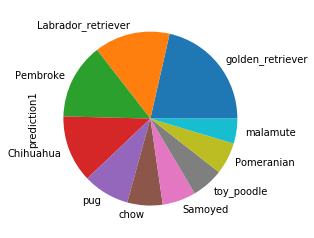

In [104]:
#Find most common dog's breeds
df.prediction1.value_counts()[:10].plot(kind='pie')

In [105]:
#Let's find how many dog's breeds are easy to predict
df.query('prediction1_dog==True & prediction2_dog==True & prediction3_dog==True').prediction1.nunique()

109

In [107]:
#Let's find how many dog's breeds are difficut to predict
df.query('prediction1_dog==True & prediction2_dog==False & prediction3_dog==False').prediction1.nunique()

21

In [108]:
df_2=df.query('dog_stage in ["doggo","floofer","puppo", "pupper"]')

In [109]:
df_2.dog_stage.value_counts()

pupper     143
doggo      47 
puppo      19 
floofer    7  
Name: dog_stage, dtype: int64

Text(0.5, 1.0, "Top 15 dog's breeds with the highest average rating")

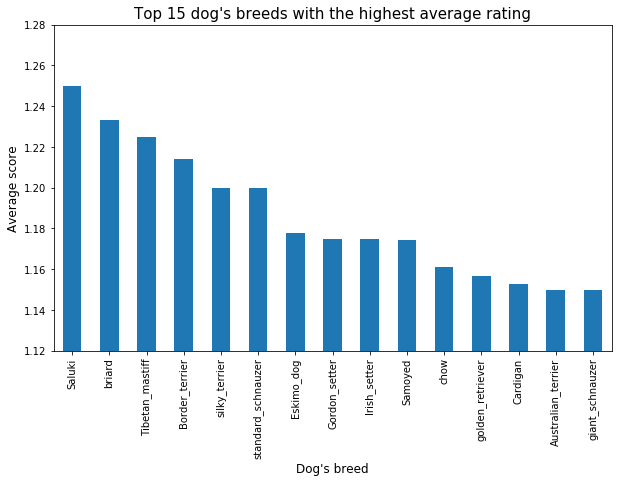

In [110]:
#Let's find top 15 dogs breeds based on average rating.

# Let's plot the top scores for the top 30 breeds on a standard bar chart
fig = plt.figure(figsize=(10,6))
df.groupby('prediction1').dog_rating.mean().sort_values(ascending=False)[:15].plot(kind='bar')
plt.ylim(1.12,1.28);
plt.xlabel("Dog's breed", fontsize=12)
plt.ylabel("Average score", fontsize=12)
plt.title("Top 15 dog's breeds with the highest average rating", fontsize=15)

Text(0.5, 1.0, "Top 15 dog's breeds with the highest favourite count")

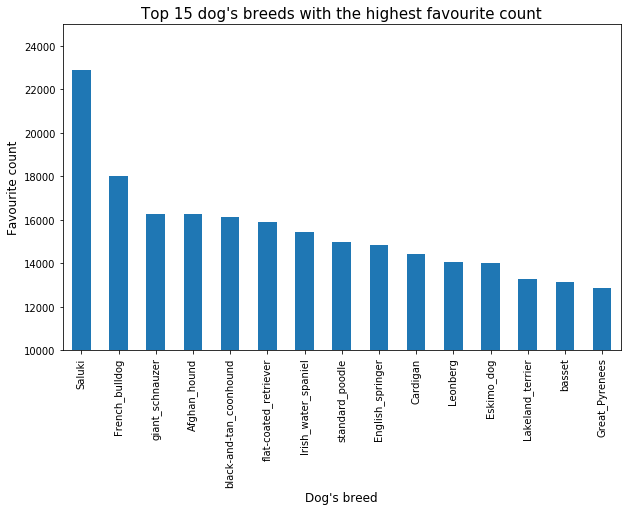

In [111]:
fig = plt.figure(figsize=(10,6))
df.groupby('prediction1').favorite_count.mean().sort_values(ascending=False)[:15].plot(kind='bar')
plt.ylim(10000,25000);
plt.xlabel("Dog's breed", fontsize=12)
plt.ylabel("Favourite count", fontsize=12)
plt.title("Top 15 dog's breeds with the highest favourite count", fontsize=15)

Text(0.5, 1.0, "Top 15 dog's breeds with the highest retweet count")

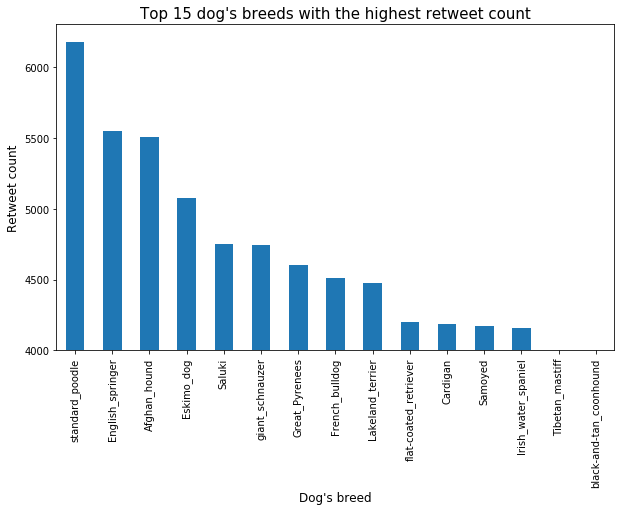

In [112]:
fig = plt.figure(figsize=(10,6))
df.groupby('prediction1').retweet_count.mean().sort_values(ascending=False)[:15].plot(kind='bar')
plt.ylim(4000,6300);
plt.xlabel("Dog's breed", fontsize=12)
plt.ylabel("Retweet count", fontsize=12)
plt.title("Top 15 dog's breeds with the highest retweet count", fontsize=15)

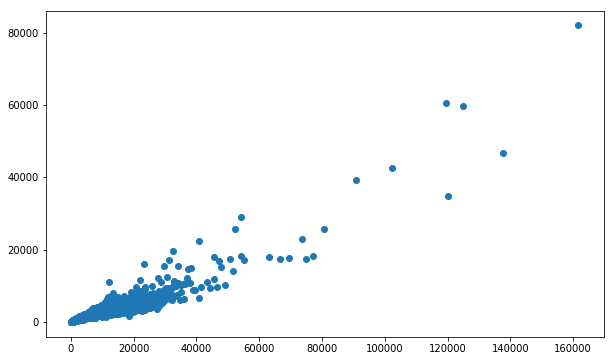

In [113]:
fig = plt.figure(figsize=(10,6))
pyplot.scatter(df.favorite_count, df.retweet_count)

In [808]:
# Let's compute correlation coefficient
df['favorite_count'].corr(df['retweet_count'])

0.9280775345405421

In [92]:
#Let's find the average favorite and retweet count for each dog stage
df_2=df[df.dog_stage.isin(['doggo','puppo','pupper','floofer'])]
df_2.dog_stage.value_counts()

pupper     143
doggo      47 
puppo      19 
floofer    7  
Name: dog_stage, dtype: int64

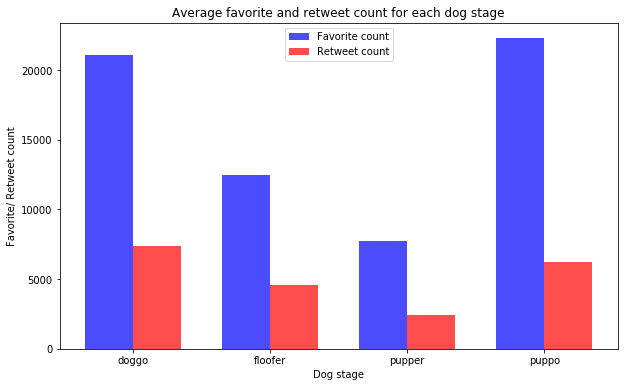

In [103]:
# grouped bar plot
fig = plt.figure(figsize=(10,6))
stage=['doggo','floofer','pupper','puppo']
ind = np.arange(len(stage))  # the x locations for the groups
width = 0.35   

plt.bar(ind, df_2.groupby('dog_stage').favorite_count.mean(), width, color='b', alpha=.7, label='Favorite count')
plt.bar(ind + width, df_2.groupby('dog_stage').retweet_count.mean(), width, color='r', alpha=.7, label='Retweet count')

# title and labels
plt.ylabel('Favorite/ Retweet count')
plt.xlabel('Dog stage')
plt.title('Average favorite and retweet count for each dog stage')
locations = ind + width / 2  # xtick locations
labels = ['doggo', 'floofer', 'pupper', 'puppo']  # xtick labels
plt.xticks(locations, labels)
plt.legend()

# Conclusion

* Golden retvier is the most common dog's breed, following by Labrador retriever, pembroke and chihuahua.
* Saluki has the highest average rating, followed by briard and Tibetan mastiff.
* Saluki again has the highest favorite count, followed by French bulldog.
* Standard poodle has the highest retweet count.
* Favorite and retweet count have a strong positive relationship.
* Overall, the favorite count is higher that retweet count for all dog stages. It can be also observed that doggo and puppo have the highest favorite and retweet counts, while pupper have the lowest both favorite and retweet counts. 